# The Maximal Coverage Location Problem (MCLP)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Median" data-toc-modified-id="p-Median-1.1">p Median</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### MCLP

Maximum Coverage Location Problems (MCLP) was proposed by Church and ReVelle \cite{church1974maximal}. Initially, for the coverage location problem, we assume that there is a transportation network that is given along with the location of demand points and facilities. Therefore, for each demand point $i$, it should be given a coverage radius $R_i$ so that demand point $i$ can be served by a facility currently located within a distance of demand point $i$. Hence, from this perspective, the objective of MCLP is to cover the most demand points (or serve more customers) under the condition that the number and radius of facilities are known.

The ILP formulation of MCLP is as follows：

$\begin{array} \displaystyle \textbf{Maximize} & \sum_{i=1}^{n}{a_iX_i} && (1) \\
\displaystyle \textbf{Subject to:} & \sum_{j\in N_i}{Y_j \geq X_i} & \forall i & (2) \\
            & \sum_{j}{Y_j = p} & \forall j & (3) \\
            & X_i \in \{0,1\} & \forall i & (4) \\
            & Y_j \in \{0,1\} & \forall j & (5) \\ \end{array}$

$\begin{array} \displaystyle \textbf{Where:}\\ & & \displaystyle i & \small = & \textrm{index referencing nodes of the network as demand} \\
& & j & \small = & \textrm{index referencing nodes of the network as potential facility sites} \\
& & S & \small = & \textrm{maximal acceptable service distance or time standard} \\
& & d_{ij} & \small = & \textrm{shortest distance or travel time between nodes } i \textrm{ and } j \\
& & N_i & \small = & \{j | d_{ij} < S\} \\
& & p & \small = & \textrm{number of facilities to be located} \\
& & Y_j & \small = & \begin{cases} 
          1, \text{if a facility is located at node } j \\
          0, \text{otherwise} \\
       \end{cases} \\
& & X_i & \small = & \begin{cases} 
              1, \textrm{if demand } i \textrm{ is covered within a service standard} \\
              0, \textrm{otherwise} \\
           \end{cases}\end{array}$
        

## Setup

In [1]:
from pulp import *
import random
from itertools import product
import numpy as np
from location.CModel import MaximumCoveringModel
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import osmnx as ox

## Example

### Random Data

In [2]:
np.random.seed(0) # random seed

solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


In [3]:
def display_points_with_mclp(data, ax,solution, radius):
    ax = plt.gca()
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    for i in solution:
        plt.scatter(data[:, 0], data[:, 1], c='red')
        plt.scatter(data[i][0], data[i][1], c='blue', marker='+')
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='b', fill=False, lw=1)
        ax.add_artist(circle)

In [4]:
n_points = 20
p = 4
radius = 0.2
num_people = np.random.randint(1, 2, size=n_points)
points = [(random.random(), random.random()) for i in range(n_points)]
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [5]:
selected, served, obj = MaximumCoveringModel(num_points=n_points,
                                           num_located=p,
                                           num_people=num_people,
                                           cover=A,
                                           solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected position =  [3, 7, 9, 13]
Served position =  [1, 3, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19]
Max served number =  15.0


TypeError: cannot unpack non-iterable NoneType object

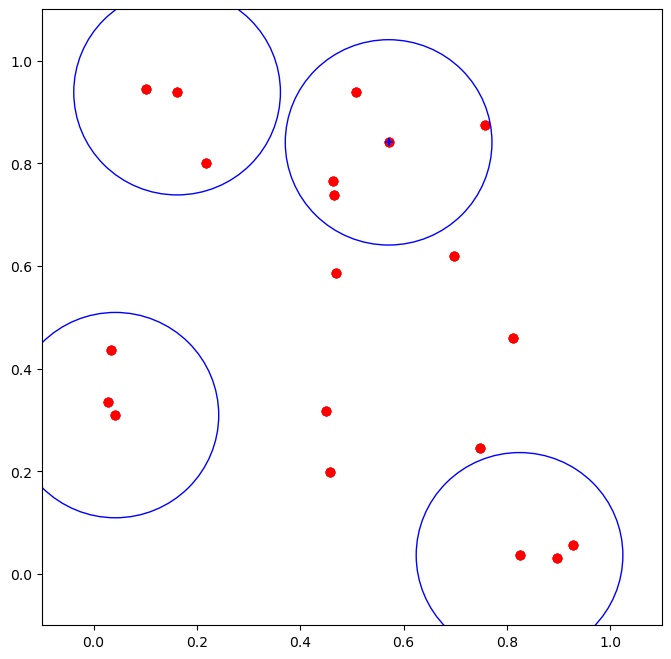

In [12]:
fig = plt.figure(figsize=(8, 8))
# name = 'MCLP(P=' + str(p) + ',N=' + str(n_points) + ')'
# plt.title(name, fontsize = 12)
ax1 = fig.add_subplot(111)
display_points_with_mclp(points_np, ax1, selected, radius)

### Road Network Data

In [13]:
df = pd.read_csv('北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [14]:
radius = 0.03
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
selected, served, obj = MaximumCoveringModel(num_points=num_points,
                                           num_located=num_located,
                                           num_people=num_people,
                                           cover=A,
                                           solver=CPLEX_CMD()).prob_solve()

Status: Optimal
Selected position =  [8, 25, 32, 41, 80, 81, 83, 84, 87, 99]
Served position =  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]
Max served number =  106.0


In [23]:
def display_mclp_with_road_network(data, solution, radius):
    for j in range(num_points):
        if j in selected:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    #         plt.scatter(ly,lx,c='red',s=10**6, marker='o')
        else:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
    ax = plt.gca()
    for i in solution:
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='#1E90FF', fill=False, lw=5)
        ax.add_artist(circle)

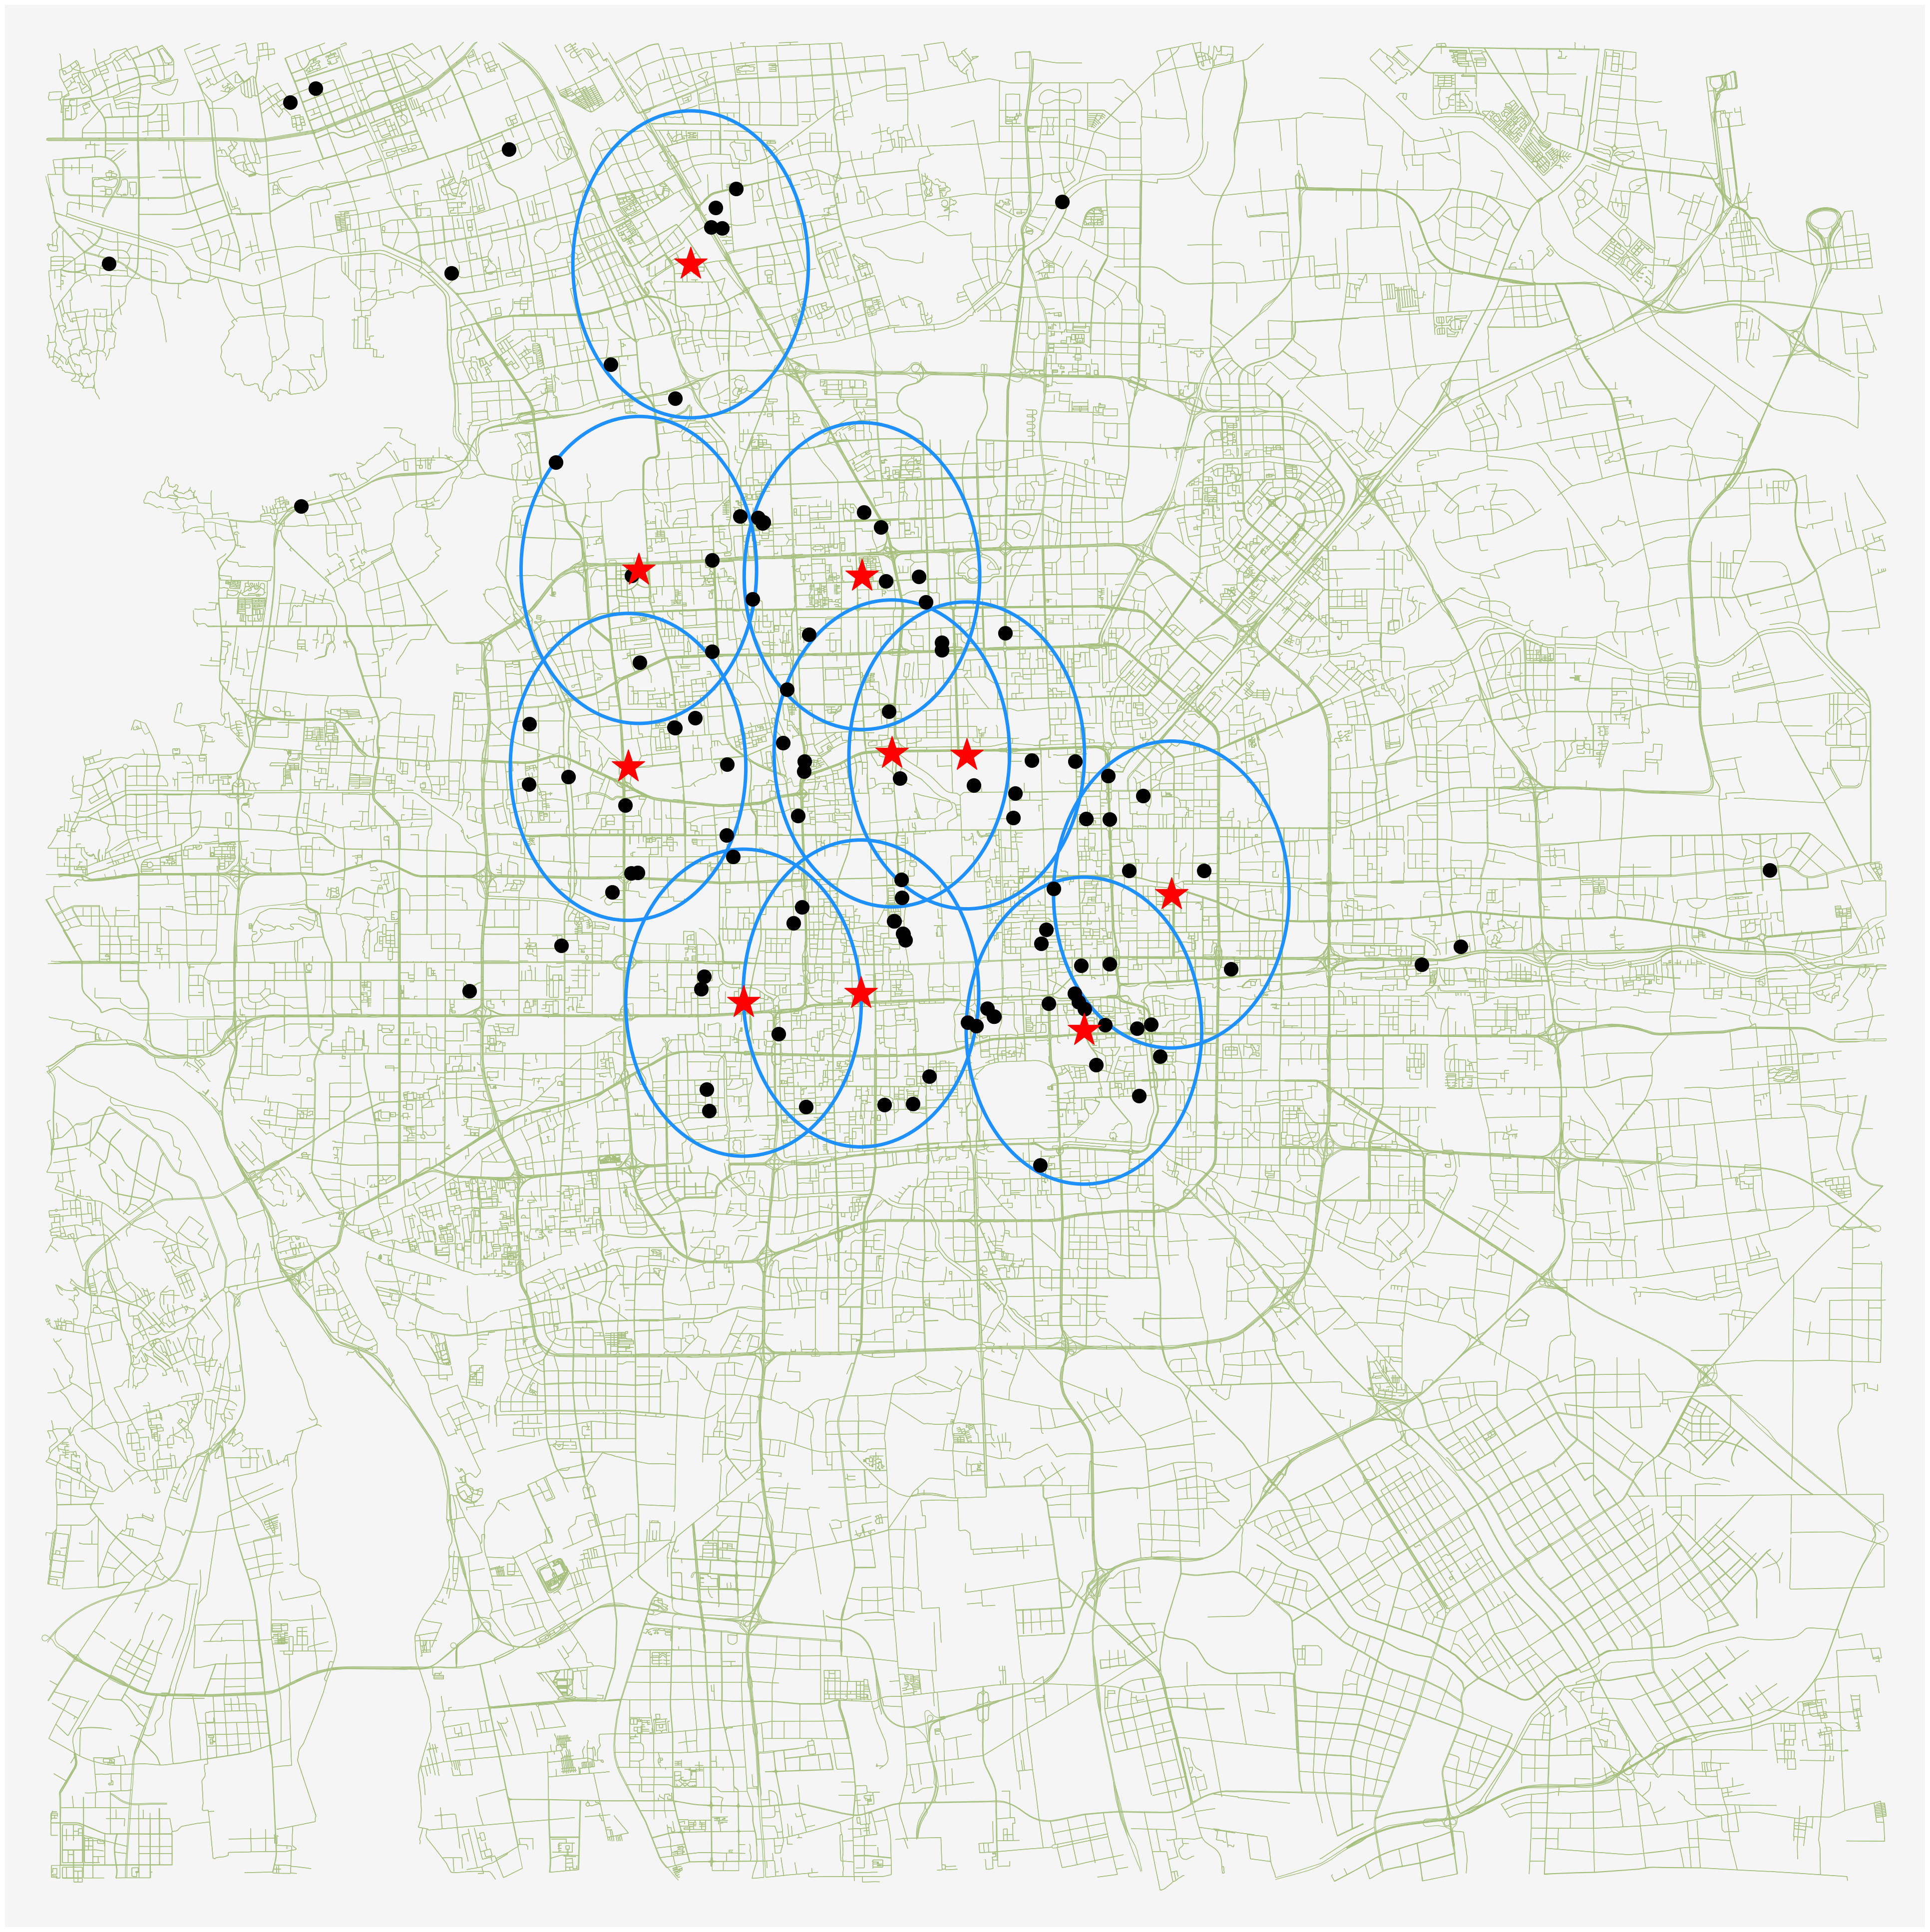

In [25]:
G = ox.graph_from_address('Beijing', dist=20000, network_type='drive')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
display_mclp_with_road_network(points_np, selected, radius)